# XGB模型可视化

File found at ../model/xgb_models/xgb_model_7.json


<Figure size 1000x800 with 0 Axes>

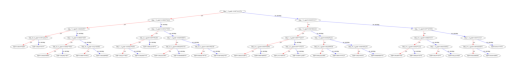

In [5]:
import os
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
import graphviz

target_T = 7

# 指定Graphviz的路径
os.environ["PATH"] += os.pathsep + 'E:\\Graphviz\\bin'

model_path = f'../model/xgb_models/xgb_model_{target_T}.json'
if not os.path.isfile(model_path):
    print(f"No file found at {model_path}")
else:
    print(f"File found at {model_path}")
    # 加载模型
    bst = xgb.Booster()
    bst.load_model(model_path)
    # 绘制决策树
    plt.figure(figsize=(10, 8))  # 可以调整图形大小
    xgb.plot_tree(bst, num_trees=0)
    
    # 保存图像
    plt.savefig(f'../results/XGBoost_FLIXNet/xgb可视化/xgb_model_{target_T}.png', dpi=300, bbox_inches='tight')
    plt.show()  # 然后显示图形
    plt.close()  # 关闭图形，释放内存
    
    # 使用to_graphviz生成竖直布局的Graphviz数据
    dot = xgb.to_graphviz(bst, num_trees=0, rankdir='TB')
    
    # 保存到.dot文件
    dot_file = '../results/XGBoost_FLIXNet/xgb可视化/vertical_tree.dot'
    dot.render(dot_file, format='dot')

# 特征重要性分析

In [3]:
# import xgboost as xgb
from pyecharts.charts import Bar
from pyecharts import options as opts

# 假设 bst 是你的 XGBoost 模型
f_scores = bst.get_score(importance_type='weight')  # 提取特征重要性，这里使用 'weight'

# 准备数据
features = list(f_scores.keys())
importances = list(f_scores.values())

# 使用 Pyecharts 的 Bar 创建条形图
bar = Bar()
bar.add_xaxis(features)
bar.add_yaxis("Feature Importance", importances)
bar.set_global_opts(title_opts=opts.TitleOpts(title="XGBoost Feature Importance"),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-90)))  # 如果特征名称太长，可以将标签旋转以便阅读

# 渲染图表到 HTML 文件，可以在浏览器中查看
bar.render('../results/XGBoost_FLIXNet/xgb可视化/feature_importance.html')

print('features:', features)
print('importances:', importances)

features: ['lstm_13_Y_pred', 'lstm_22_Y_pred', 'lstm_10_Y_pred', 'lstm_16_Y_pred', 'lstm_19_Y_pred', 'lstm_7_Y_pred', 'lstm_28_Y_pred', 'lstm_25_Y_pred', 'lstm_4_Y_pred', 'lstm_1_Y_pred']
importances: [139.0, 91.0, 144.0, 82.0, 73.0, 141.0, 72.0, 47.0, 123.0, 107.0]


In [4]:
import pygraphviz as pgv

# 加载完整的Graphviz图
G = pgv.AGraph(dot_file)

# 辅助函数，递归获取所有子节点
def get_all_subtree_nodes(graph, start_node):
    subtree_nodes = set()
    nodes_to_visit = [start_node]
    while nodes_to_visit:
        current_node = nodes_to_visit.pop()
        if current_node not in subtree_nodes:
            subtree_nodes.add(current_node)
            nodes_to_visit.extend(graph.successors(current_node))
    return list(subtree_nodes)

# 假设节点0是根节点，节点1和节点2是第一层的两个分支节点
# 子图1包含节点0和以节点1为根节点的所有子树
subtree_nodes_1 = get_all_subtree_nodes(G, "1")
subtree_nodes_1.append("0")  # 添加根节点到子图
subgraph1 = G.subgraph(subtree_nodes_1, name='cluster_s1')

# 子图2包含节点0和以节点2为根节点的所有子树
subtree_nodes_2 = get_all_subtree_nodes(G, "2")
subtree_nodes_2.append("0")  # 添加根节点到子图
subgraph2 = G.subgraph(subtree_nodes_2, name='cluster_s2')

# 保存两个子图
subgraph1.write('../results/XGBoost_FLIXNet/xgb可视化/subgraph1.dot')
subgraph2.write('../results/XGBoost_FLIXNet/xgb可视化/subgraph2.dot')

# 可以进一步转换为PDF
subgraph1.layout(prog='dot')
subgraph1.draw('../results/XGBoost_FLIXNet/xgb可视化/subgraph1.pdf', format='pdf')
subgraph2.layout(prog='dot')
subgraph2.draw('../results/XGBoost_FLIXNet/xgb可视化/subgraph1.pdf', format='pdf')
